Training samples: 160
Test samples: 40
Intercept: 4.77320520326983
Number of coefficients: 3


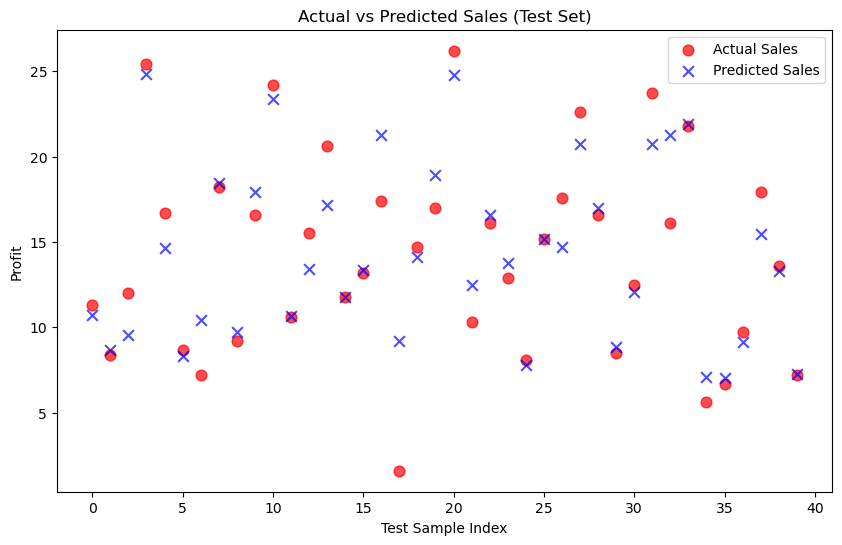

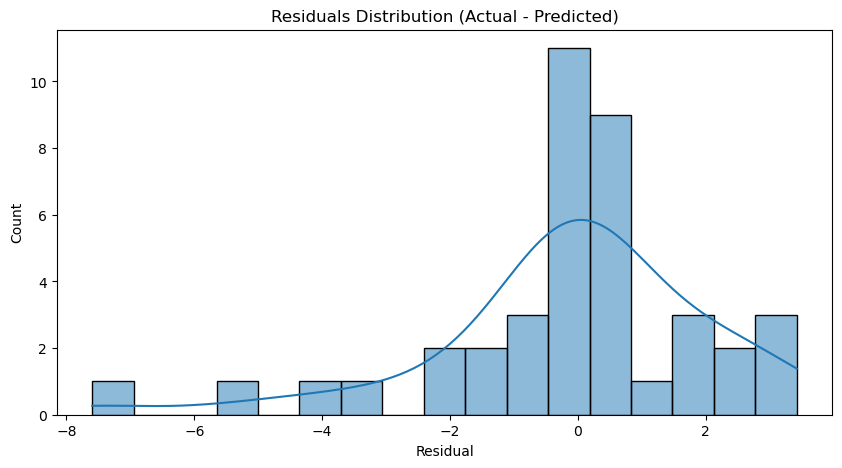

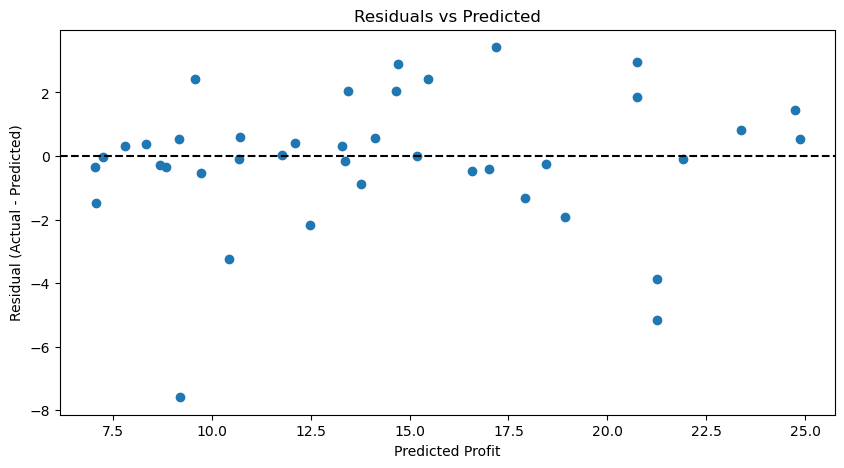

Mean Squared Error (MSE): 4.52
R^2 Score: 0.8645


In [2]:
import pandas as pd
df=pd.read_csv("advertising.csv")
df

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X,y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
y_pred = regressor.predict(X_test)

import numpy as np
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred,2)
})
comparison


# Visualization: Actual vs Predicted profits (scatter)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')